In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [2]:
def read_csv(file_path):
    df = pd.read_csv(file_path, delimiter=',')
    return df

In [3]:
data = read_csv("particle_data0.csv")
data.head()

,ParticleType,Energy
0,pi-,459.200
1,3pi-,459.169
2,pi-,459.158
3,4pi-,459.125
4,pi-,459.117


In [4]:
data.shape

(839, 2)

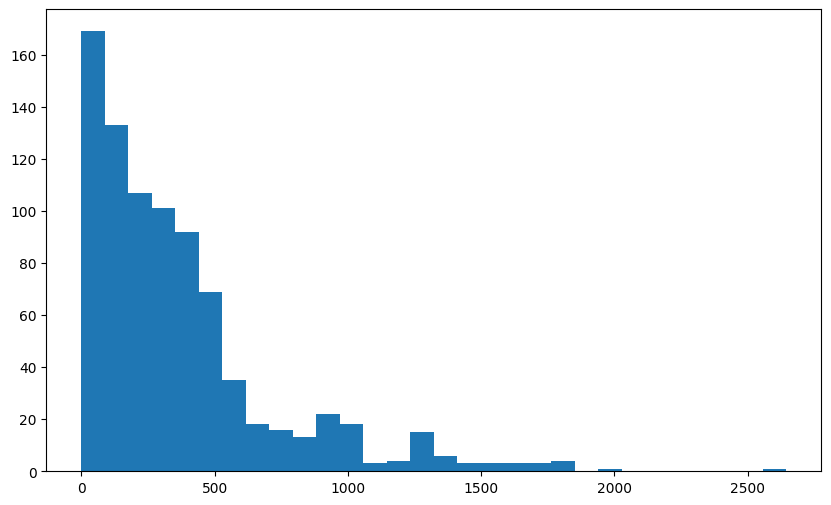

In [5]:
plt.figure(figsize=(10, 6))
plt.hist(data["Energy"], bins=30)
plt.savefig('energy_distribution.png')
plt.show()

In [6]:
particle_col = data.columns[0]
energy_col = data.columns[1]

# Separate particles based on whether they have "2" at position 0
det1_particle = []
det1_energy = []
det2_particle = []
det2_energy = []
det3_particle = []
det3_energy = []
det4_particle = []
det4_energy = []

for i, row in data.iterrows():
    particle_name = str(row[particle_col])
    energy = float(row[energy_col])
    
    # Check if particle was detected in detector 2
    if particle_name.startswith('2') or '_2' in particle_name or 'Det_2' in particle_name:
        det2_particle.append(particle_name)
        det2_energy.append(energy)
    elif particle_name.startswith('3') or '_3' in particle_name or 'Det_3' in particle_name:
        det3_particle.append(particle_name)
        det3_energy.append(energy)
    elif particle_name.startswith('4') or '_4' in particle_name or 'Det_4' in particle_name:
        det4_particle.append(particle_name)
        det4_energy.append(energy)
    else:
        det1_particle.append(particle_name)
        det1_energy.append(energy)


In [7]:
mu_p_1 = []  # mu+ particles in detector 1
mu_p_1_e = []  # mu+ energies in detector 1
mu_m_1 = []  # mu- particles in detector 1
mu_m_1_e = []  # mu- energies in detector 1
pi_p_1 = []  # pi+ particles in detector 1
pi_p_1_e = []  # pi+ energies in detector 1
pi_m_1 = []  # pi- particles in detector 1
pi_m_1_e = []  # pi- energies in detector 1
mu_p_2 = []  # mu+ particles in detector 2
mu_p_2_e = []  # mu+ energies in detector 2
mu_m_2 = []  # mu- particles in detector 2
mu_m_2_e = []  # mu- energies in detector 2
pi_p_2 = []  # pi+ particles in detector 2
pi_p_2_e = []  # pi+ energies in detector 2
pi_m_2 = []  # pi- particles in detector 2
pi_m_2_e = []  # pi- energies in detector 2

# Detector 3
mu_p_3 = []      # mu+ particles in detector 3
mu_p_3_e = []    # mu+ energies in detector 3
mu_m_3 = []      # mu- particles in detector 3
mu_m_3_e = []    # mu- energies in detector 3
pi_p_3 = []      # pi+ particles in detector 3
pi_p_3_e = []    # pi+ energies in detector 3
pi_m_3 = []      # pi- particles in detector 3
pi_m_3_e = []    # pi- energies in detector 3

# Detector 4
mu_p_4 = []      # mu+ particles in detector 4
mu_p_4_e = []    # mu+ energies in detector 4
mu_m_4 = []      # mu- particles in detector 4
mu_m_4_e = []    # mu- energies in detector 4
pi_p_4 = []      # pi+ particles in detector 4
pi_p_4_e = []    # pi+ energies in detector 4
pi_m_4 = []      # pi- particles in detector 4
pi_m_4_e = []    # pi- energies in detector 4


In [8]:

for i in range(0, len(det1_particle)):
    if det1_particle[i] == "mu+":
        mu_p_1.append(det1_particle[i])
        mu_p_1_e.append(det1_energy[i])
    elif det1_particle[i] == "mu-":
        mu_m_1.append(det1_particle[i])
        mu_m_1_e.append(det1_energy[i])
    elif det1_particle[i] == "pi+":
        pi_p_1.append(det1_particle[i])
        pi_p_1_e.append(det1_energy[i])
    elif det1_particle[i] == "pi-":
        pi_m_1.append(det1_particle[i])
        pi_m_1_e.append(det1_energy[i])

In [9]:
for i in range(0, len(det2_particle)):
    # Strip any detector suffix to get the base particle name
    particle_name = det2_particle[i]
    if particle_name == "2mu+":
        mu_p_2.append(det2_particle[i])
        mu_p_2_e.append(det2_energy[i])
    elif particle_name == "2mu-":
        mu_m_2.append(det2_particle[i])
        mu_m_2_e.append(det2_energy[i])
    elif particle_name == "2pi+":
        pi_p_2.append(det2_particle[i])
        pi_p_2_e.append(det2_energy[i])
    elif particle_name == "2pi-":
        pi_m_2.append(det2_particle[i])
        pi_m_2_e.append(det2_energy[i])

In [10]:
# For Detector 3
for i in range(0, len(det3_particle)):
    if det3_particle[i] == "mu+":
        mu_p_3.append(det3_particle[i])
        mu_p_3_e.append(det3_energy[i])
    elif det3_particle[i] == "mu-":
        mu_m_3.append(det3_particle[i])
        mu_m_3_e.append(det3_energy[i])
    elif det3_particle[i] == "pi+":
        pi_p_3.append(det3_particle[i])
        pi_p_3_e.append(det3_energy[i])
    elif det3_particle[i] == "pi-":
        pi_m_3.append(det3_particle[i])
        pi_m_3_e.append(det3_energy[i])

# For Detector 4
for i in range(0, len(det4_particle)):
    if det4_particle[i] == "4mu+":
        mu_p_4.append(det4_particle[i])
        mu_p_4_e.append(det4_energy[i])
    elif det4_particle[i] == "4mu-":
        mu_m_4.append(det4_particle[i])
        mu_m_4_e.append(det4_energy[i])
    elif det4_particle[i] == "4pi+":
        pi_p_4.append(det4_particle[i])
        pi_p_4_e.append(det4_energy[i])
    elif det4_particle[i] == "4pi-":
        pi_m_4.append(det4_particle[i])
        pi_m_4_e.append(det4_energy[i])


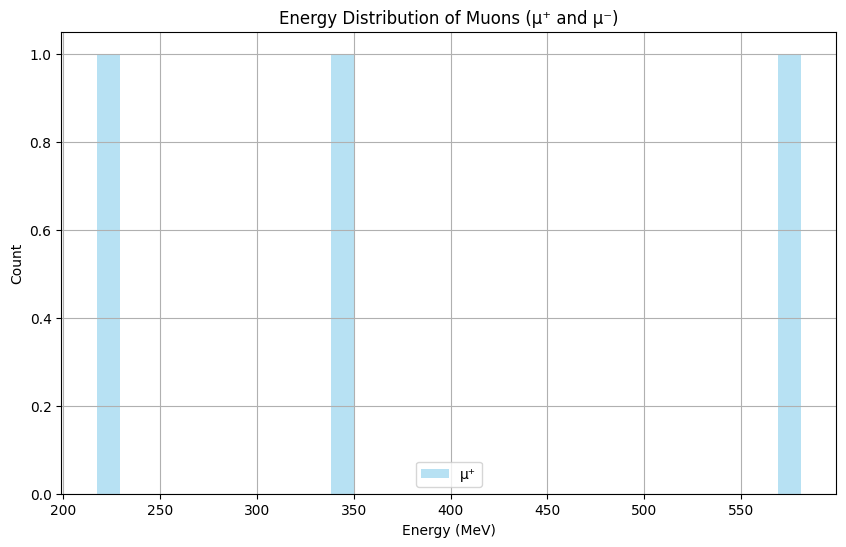

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(mu_p_4_e, bins=30, alpha=0.6, label='μ⁺', color='skyblue')
plt.xlabel('Energy (MeV)')
plt.ylabel('Count')
plt.title('Energy Distribution of Muons (μ⁺ and μ⁻)')
plt.legend()
plt.grid(True)
plt.show()

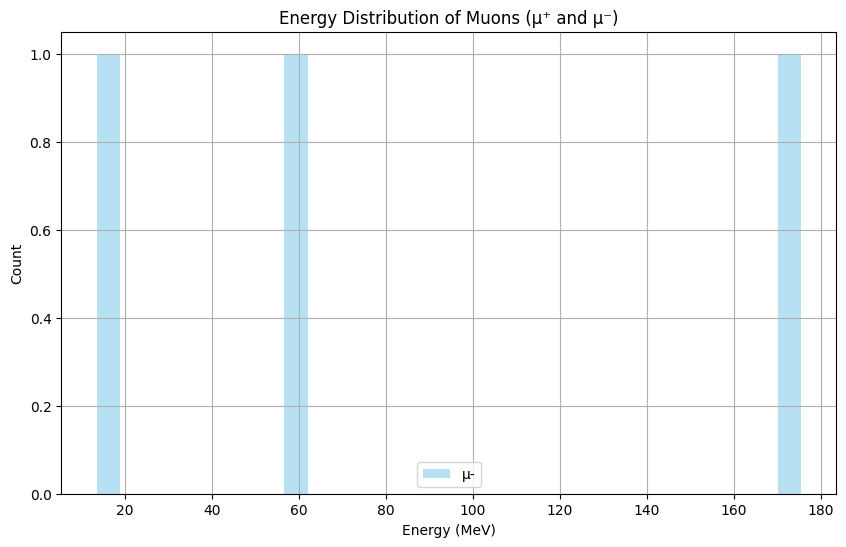

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(mu_m_4_e, bins=30, alpha=0.6, label='μ-', color='skyblue')
plt.xlabel('Energy (MeV)')
plt.ylabel('Count')
plt.title('Energy Distribution of Muons (μ⁺ and μ⁻)')
plt.legend()
plt.grid(True)
plt.show()

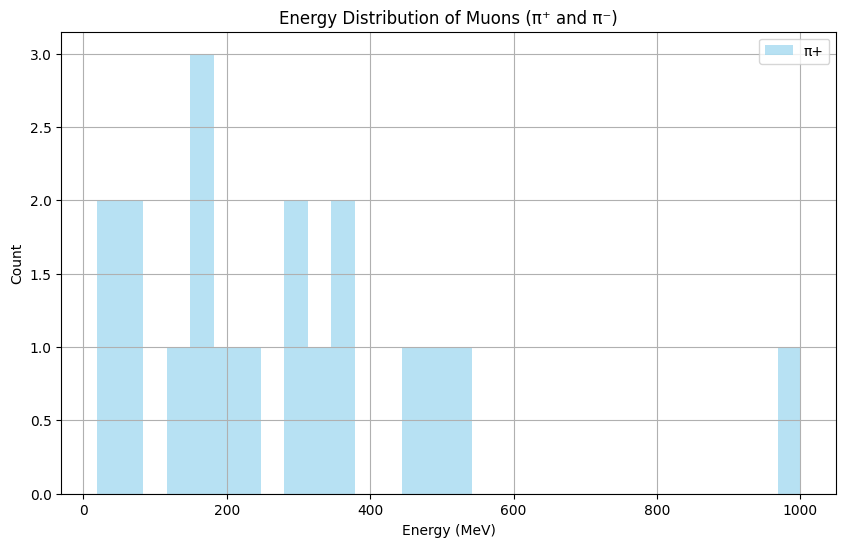

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(pi_p_4_e, bins=30, alpha=0.6, label='π+', color='skyblue')
plt.xlabel('Energy (MeV)')
plt.ylabel('Count')
plt.title('Energy Distribution of Muons (π⁺ and π⁻)')
plt.legend()
plt.grid(True)
plt.show()

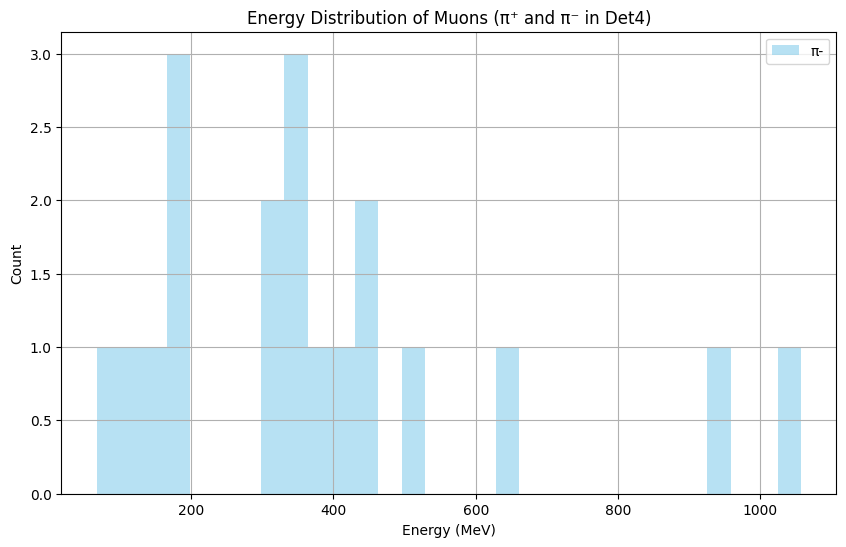

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(pi_m_4_e, bins=30, alpha=0.6, label='π-', color='skyblue')
plt.xlabel('Energy (MeV)')
plt.ylabel('Count')
plt.title('Energy Distribution of Muons (π⁺ and π⁻ in Det4)')
plt.legend()
plt.grid(True)
plt.show()

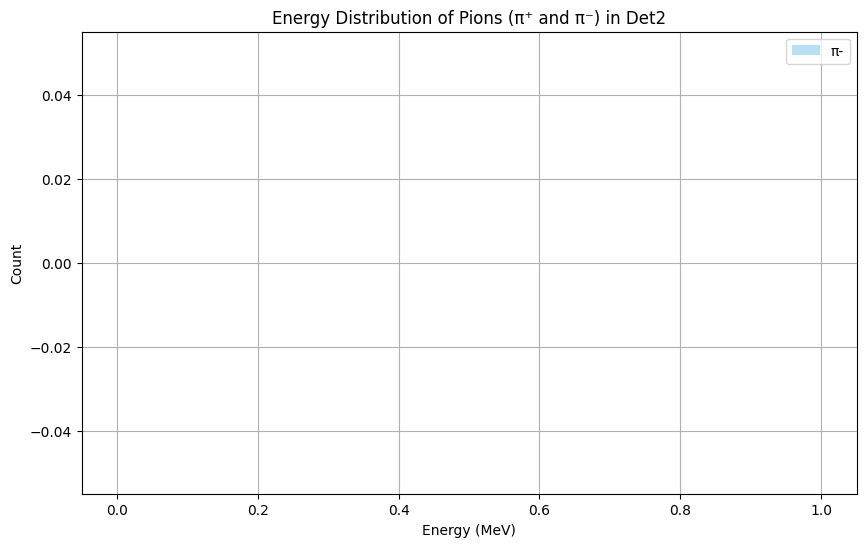

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(pi_m_2_e, bins=30, alpha=0.6, label='π-', color='skyblue')
plt.xlabel('Energy (MeV)')
plt.ylabel('Count')
plt.title('Energy Distribution of Pions (π⁺ and π⁻) in Det2')
plt.legend()
plt.grid(True)
plt.show()

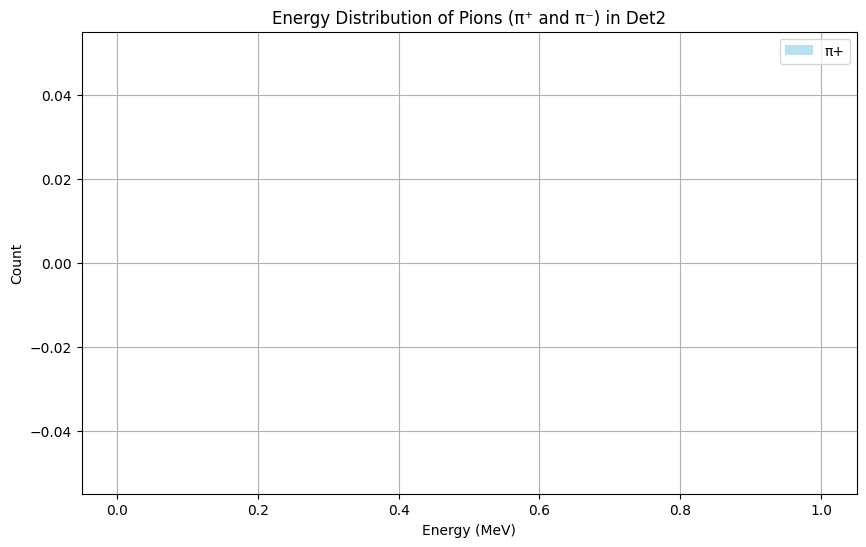

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(pi_p_2_e, bins=30, alpha=0.6, label='π+', color='skyblue')
plt.xlabel('Energy (MeV)')
plt.ylabel('Count')
plt.title('Energy Distribution of Pions (π⁺ and π⁻) in Det2')
plt.legend()
plt.grid(True)
plt.show()

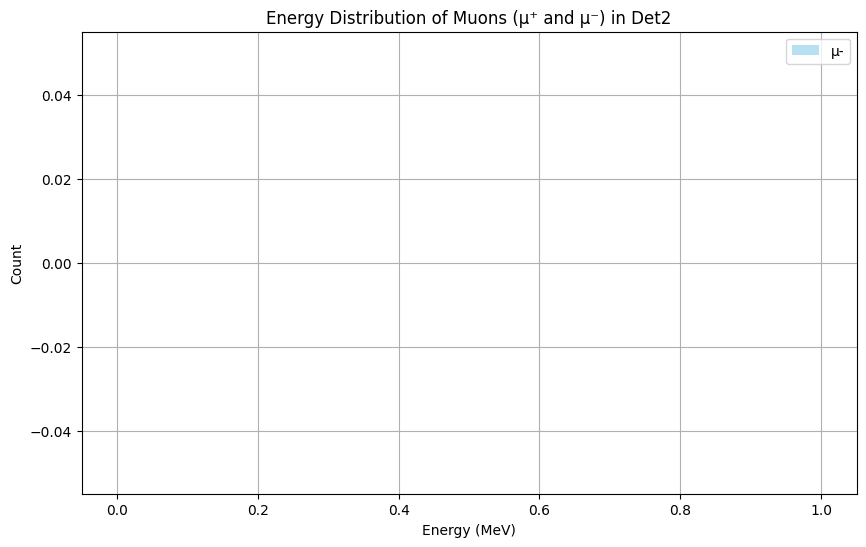

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(mu_m_2_e, bins=30, alpha=0.6, label='μ-', color='skyblue')
plt.xlabel('Energy (MeV)')
plt.ylabel('Count')
plt.title('Energy Distribution of Muons (μ⁺ and μ⁻) in Det2')
plt.legend()
plt.grid(True)
plt.show()

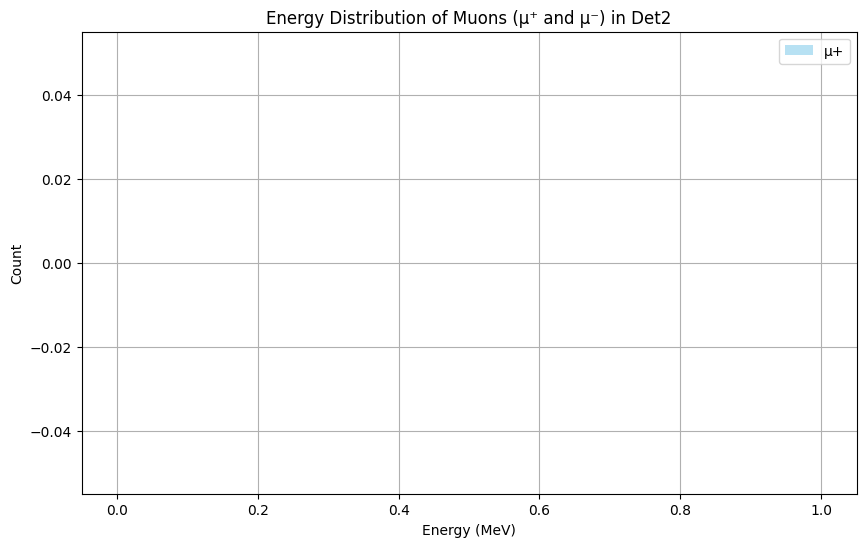

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(mu_p_2_e, bins=30, alpha=0.6, label='μ+', color='skyblue')
plt.xlabel('Energy (MeV)')
plt.ylabel('Count')
plt.title('Energy Distribution of Muons (μ⁺ and μ⁻) in Det2')
plt.legend()
plt.grid(True)
plt.show()


Plot total number of muon and pions vs energy 

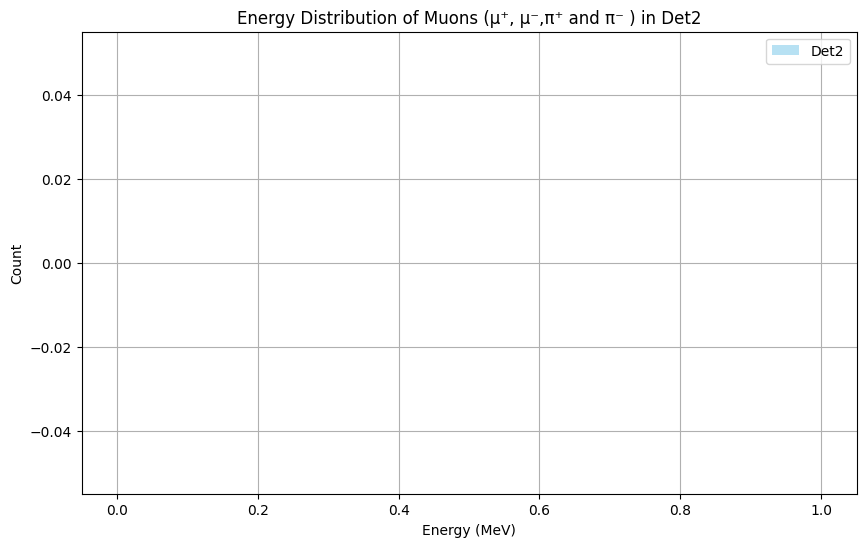

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(det2_energy, bins=30, alpha=0.6, label='Det2', color='skyblue')
plt.xlabel('Energy (MeV)')
plt.ylabel('Count')
plt.title('Energy Distribution of Muons (μ⁺, μ⁻,π⁺ and π⁻ ) in Det2')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
len(det4_energy)

44

In [21]:
import csv

In [33]:
# Initialize separate lists for each column
detector_list = []
particle_type_list = []
x_list = []
px_list = []
y_list = []
py_list = []
z_list = []
pz_list = []
total_energy_list = []

# Path to your CSV file
filename = '6D_vector.csv'  # Change to your file path

# Read the CSV file
with open(filename, mode='r', newline='') as file:
    reader = csv.DictReader(file)
    for row in reader:
        detector_list.append(row['Detector'])
        particle_type_list.append(row['ParticleType'])
        x_list.append(float(row['x[cm]']))
        px_list.append(float(row['px[MeV/c]']))
        y_list.append(float(row['y[cm]']))
        py_list.append(float(row['py[MeV/c]']))
        z_list.append(float(row['z[cm]']))
        pz_list.append(float(row['pz[MeV/c]']))
        total_energy_list.append(float(row['TotalEnergy[MeV]']))

In [34]:
x_3 = []
x_4 = []
y_3 = []
y_4 = []
x_2 = []
y_2 = []
z_4 = []
pz_3 = []
pz_4 = []
py_3 = []
py_4 = []
px_3 = []
px_4 = []
px_2 = []
py_2 = []
pz_2 = []
for i in range(0,len(detector_list)):
    if int(detector_list[i]) == 2:
        px_2.append(px_list[i])
        py_2.append(py_list[i])
        pz_2.append(pz_list[i])
        x_2.append(x_list[i])
        y_2.append(y_list[i])
    if int(detector_list[i]) == 3:
        pz_3.append(pz_list[i])
        px_3.append(px_list[i])
        py_3.append(py_list[i])
        x_3.append(x_list[i])
        y_3.append(y_list[i])
    if int(detector_list[i]) == 4:
        pz_4.append(pz_list[i])
        px_4.append(px_list[i])
        py_4.append(py_list[i])
        x_4.append(x_list[i])
        y_4.append(y_list[i])
        z_4.append(z_list[i])

In [35]:
len(x_3)

7589

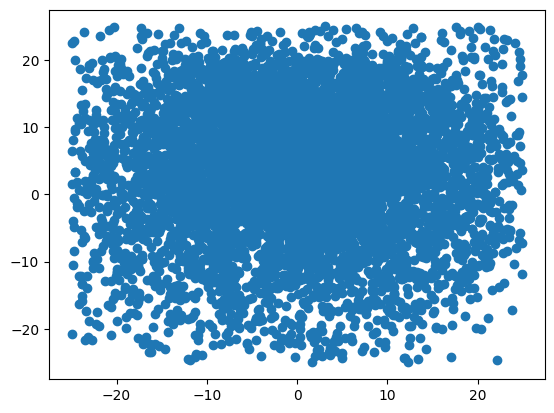

In [36]:
plt.scatter(x_3,y_3)
plt.show()

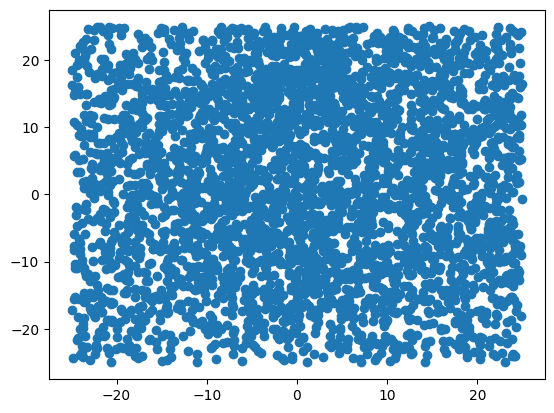

In [38]:
plt.scatter(x_4,y_4)
plt.show()

In [27]:
import statistics as stat

print(stat.mean(pz_2)) #before helium cloud
print(stat.mean(pz_3)) #after helium cloud
print(stat.mean(pz_4)) #after rf cavity

StatisticsError: mean requires at least one data point

In [ ]:
print(stat.mean(px_2)) #before helium cloud
print(stat.mean(px_3)) #after helium cloud
print(stat.mean(px_4)) #after rf cavity

In [ ]:
print(stat.mean(py_2)) #before helium cloud
print(stat.mean(py_3)) #after helium cloud
print(stat.mean(py_4)) #after rf cavity

In [ ]:
plt.scatter(x_2,y_2)
plt.xlabel("X [cm]")
plt.ylabel("Y [cm]")
plt.show()

In [ ]:
plt.scatter(x_3,y_3)
plt.xlabel("X [cm]")
plt.ylabel("Y [cm]")
plt.show()

In [ ]:
plt.scatter(x_4,y_4)
plt.xlabel("X [cm]")
plt.ylabel("Y [cm]")
plt.show()

In [ ]:
print(len(x_2),
len(x_3),
len(x_4))

In [ ]:
det4_energy


In [ ]:
pz_4


In [ ]:
plt.scatter(x_4,px_4)